<a href="https://colab.research.google.com/github/sramanah/sramanah/blob/main/Final_Model_Jul_25_2022_Shaleena_Ramanah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detecting Credit Card Fraud using a Hybrid Approach**

by Shaleena Ramanah

# **Installing necessary packages**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import scipy

# **Uploading the data**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


# **Convert to dataframe**

In [271]:
#converting csv file to panda
df =pd.read_csv("creditcard.csv")

# **31 features, 284807 instances. No missing values**

In [272]:
df.info()
#284807 instances
#31 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [321]:
#no missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# **Categorical features (Class) vs Numerical features(Time, Amount, V1-V28)**



In [322]:
# Finding unique values for each column in order to identify categorical and numeric variables

# Usually if the numer of unique values are less than 20, the variable is likely to be categorical, otherwise it is continuous
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

# **Univariate Analysis**

In [323]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# **Visualize distribution of Continuous Variables**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb75022b90>,
      dtype=object)

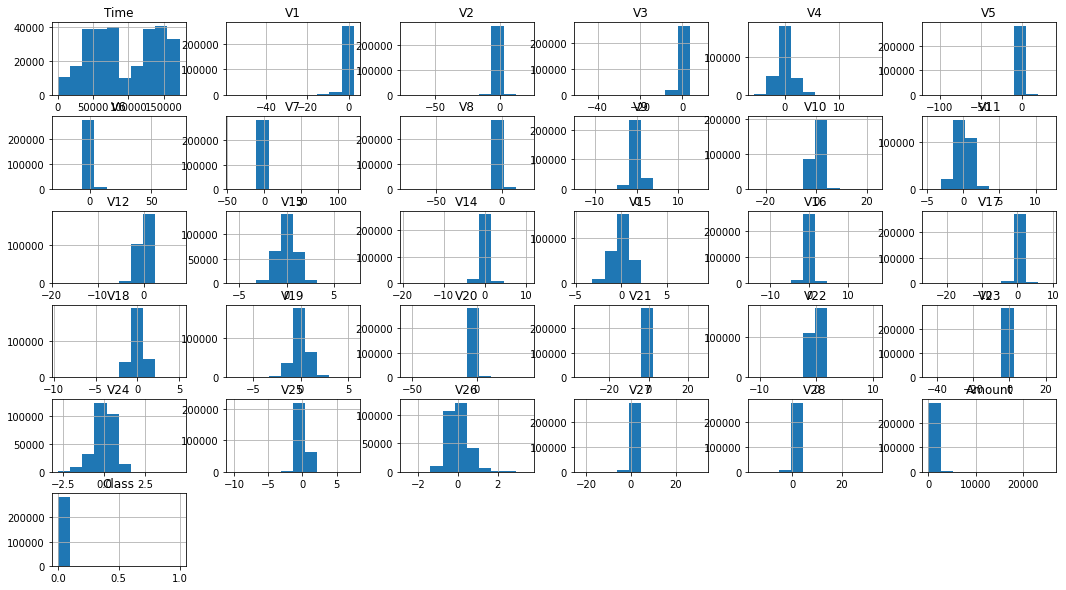

In [324]:
# Plotting histograms of continuous variables

df.hist(figsize=(18,10))

# **Bivariate Analysis**

# ***** PART 1 - **Separating the Dataset into Fraud and Normal**

In [5]:
#Separating the dataset into 2 classes - Normal and Fraud

fraud = df[df['Class']==1]
normal = df[df['Class']==0]

In [5]:
print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


In [ ]:
#let's analyse the difference between the normal amounts and fraudulent amounts

normal.Amount.describe()
#mean normal amount 88 euros
#max is 25,691
#min is 0

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()
#mean fradulent amount is 122 euro
#max is 2,125.87 euros
#min is 0

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

#Do the fradulent transactions occur during a specific timeframe?

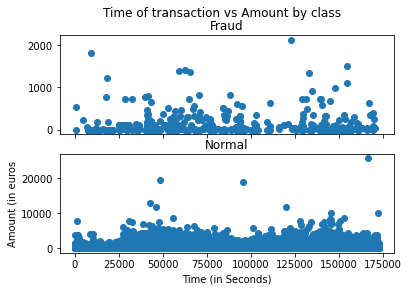

In [ ]:
#Do the fradulent transactions occur during a specific timeframe?



f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount (in euros')
plt.show();


# **Making a copy of the data **

In [6]:
data = df.copy()

# **Data Transformation**

#***** PART 2 - **Analysing the Dataset by separating the data into Day 1 and Day 2**

As Time is the duration in seconds from the first transaction, we will create a new feature to convert seconds to Date.

We are also creating another column to distinguish the transactions from day 1 and day 2

Time_new = Date
Day = Day 1 or Day 2

In [7]:
data['Time_new'] = pd.to_datetime(data['Time'], unit='s')


In [8]:
#To separate travel date to different columns -Date and Day as Time is in duration (seconds)
data['Date'] = pd.to_datetime(data['Time_new']).dt.date
data['Day'] = pd.to_datetime(data['Date']).dt.day

In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Time_new,Date,Day
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1970-01-01 00:00:00,1970-01-01,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1970-01-01 00:00:00,1970-01-01,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1970-01-01 00:00:01,1970-01-01,1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1970-01-01 00:00:01,1970-01-01,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1970-01-01 00:00:02,1970-01-01,1


Separating the dataset into Day 1 and Day 2

# **DATASET#1: Day 1 and Day 2 Datasets**

In [10]:
Day1 = data.loc[data.Day == 1]
Day2 = data.loc[data.Day == 2]
#Day 1 has 144786 rows × 34 columns
#Day 2 has 140021 rows × 34 columns

# **------> Day 1**

# **Frequency of normal and fraudulent transactions on Day 1**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


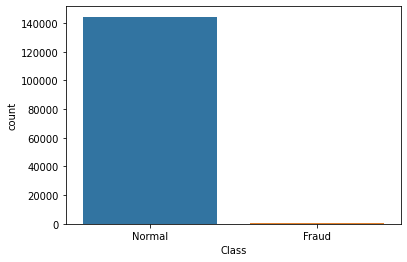

0    144505
1       281
Name: Class, dtype: int64


In [ ]:

# Frequency of normal and fraudulent transactions on Day 1
df1 = sns.countplot(Day1['Class'])
df1.set_xticklabels(['Normal','Fraud'])
plt.show()

print(pd.Series(Day1.Class).value_counts())
plt.show()

#In Day 1, there are 144,505 normal transactions and 281 fradulent transactions

# **Mean Amount of normal and fraudulent transactions on Day 1**

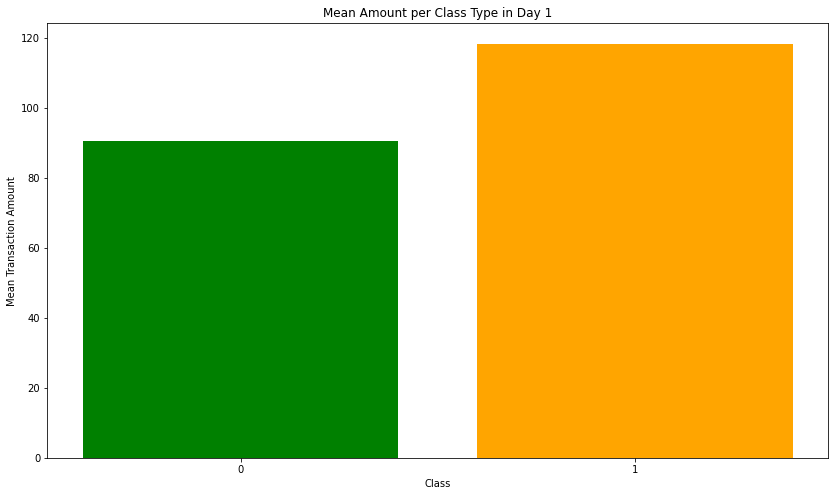

In [331]:
#Average amount per class type in Day 1
%matplotlib inline


av_amount_per_class = Day1.groupby('Class').Amount.mean()

#sort by amount
av_amount_per_class.sort_values(inplace=True)

x = av_amount_per_class.index.tolist()
y = av_amount_per_class.values.tolist()

#set figure size
plt.figure(figsize=(14,8))

#set title
plt.title('Mean Amount per Class Type in Day 1')

#set axis labels
plt.xlabel('Class')
plt.ylabel('Mean Transaction Amount')

plt.xticks(labels=x, ticks=np.arange(len(x)))

plt.bar(x,y, color =['green', 'orange']);

# **DATASET#2: Fraudulent transactions on Day 1 and Normal transactions on Day 1**

In [11]:
FraudDay1 = Day1.loc[Day1.Class == 1]
NormalDay1 = Day1.loc[Day1.Class == 0]

In [12]:
FraudDay1.shape

(281, 34)

# **Frequency of Fraudulent Transactions on Day 1**

(array([163.,  10.,  41.,  11.,   6.,   3.,   7.,   4.,   9.,   3.,   1.,
          1.,   3.,   1.,   4.,   1.,   0.,   1.,   0.,   2.,   1.,   2.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.    ,   36.1936,   72.3872,  108.5808,  144.7744,  180.968 ,
         217.1616,  253.3552,  289.5488,  325.7424,  361.936 ,  398.1296,
         434.3232,  470.5168,  506.7104,  542.904 ,  579.0976,  615.2912,
         651.4848,  687.6784,  723.872 ,  760.0656,  796.2592,  832.4528,
         868.6464,  904.84  ,  941.0336,  977.2272, 1013.4208, 1049.6144,
        1085.808 , 1122.0016, 1158.1952, 1194.3888, 1230.5824, 1266.776 ,
        1302.9696, 1339.1632, 1375.3568, 1411.5504, 1447.744 , 1483.9376,
        1520.1312, 1556.3248, 1592.5184, 1628.712 , 1664.9056, 1701.0992,
        1737.2928, 1773.4864, 1809.68  ]),
 <a list of 50 Patch ob

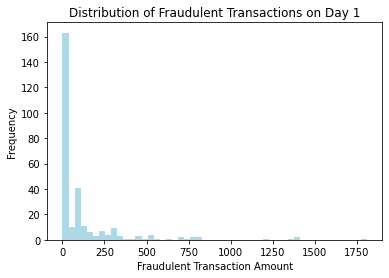

In [334]:
#title
plt.title('Distribution of Fraudulent Transactions on Day 1')

#x and y labels
plt.xlabel('Fraudulent Transaction Amount')
plt.ylabel('Frequency')

#plot histogram
plt.hist(FraudDay1['Amount'], bins=50, color='lightblue')


# **Boxplot showing Outliers of Fraudulent Transactions on Day 1**

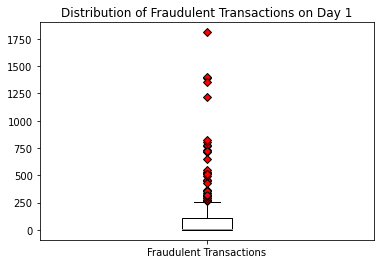

In [ ]:
data1 = FraudDay1['Amount']

#create outlier point shape
red_diamond = dict(markerfacecolor= 'r', marker='D')

#set title
plt.title('Distribution of Fraudulent Transactions on Day 1')

#plot boxplot
plt.boxplot(data1.values, labels=['Fraudulent Transactions'], flierprops = red_diamond);

# **Frequency of Normal Transactions on Day 1**

(array([1.37741e+05, 4.34600e+03, 1.26900e+03, 5.32000e+02, 2.50000e+02,
        1.07000e+02, 8.00000e+01, 5.00000e+01, 3.50000e+01, 3.00000e+01,
        2.60000e+01, 9.00000e+00, 3.00000e+00, 9.00000e+00, 3.00000e+00,
        4.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.    ,   393.1306,   786.2612,  1179.3918,  1572.5224,
         1965.653 ,  2358.7836,  2751.9142,  3145.0448,  3538.1754,
         3931.306 ,  4324.4366,  4717.5672,  5110.6978,  5503.8284,
         5896.959 ,  6290.0896,  6683.2202,  7076.3508,  7469.48

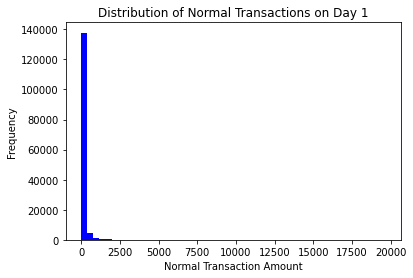

In [ ]:
#title
plt.title('Distribution of Normal Transactions on Day 1')

#x and y labels
plt.xlabel('Normal Transaction Amount')
plt.ylabel('Frequency')

#plot histogram
plt.hist(NormalDay1['Amount'], bins=50, color='blue')


# **Boxplot showing Outliers of Normal Transactions on Day 1**

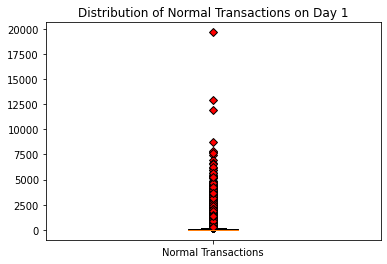

In [ ]:
data2 = NormalDay1['Amount']

#create outlier point shape
red_diamond = dict(markerfacecolor= 'r', marker='D')

#set title
plt.title('Distribution of Normal Transactions on Day 1')

#plot boxplot
plt.boxplot(data2.values, labels=['Normal Transactions'], flierprops = red_diamond);

# **------> Day 2**

# **Frequency of normal and fraudulent transactions on Day 2**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


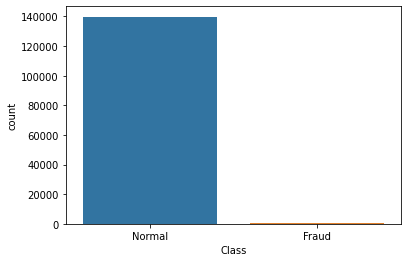

0    139810
1       211
Name: Class, dtype: int64


In [ ]:
# Frequency of Normal and Fraudulent transactions in Day 2
df2 = sns.countplot(Day2['Class'])
df2.set_xticklabels(['Normal','Fraud'])
plt.show()

print(pd.Series(Day2.Class).value_counts())
plt.show()

#In Day 2, there are 139,810 normal transactions and 211 fradulent transactions

# **Mean amount of normal and fraudulent transactions on Day 2**

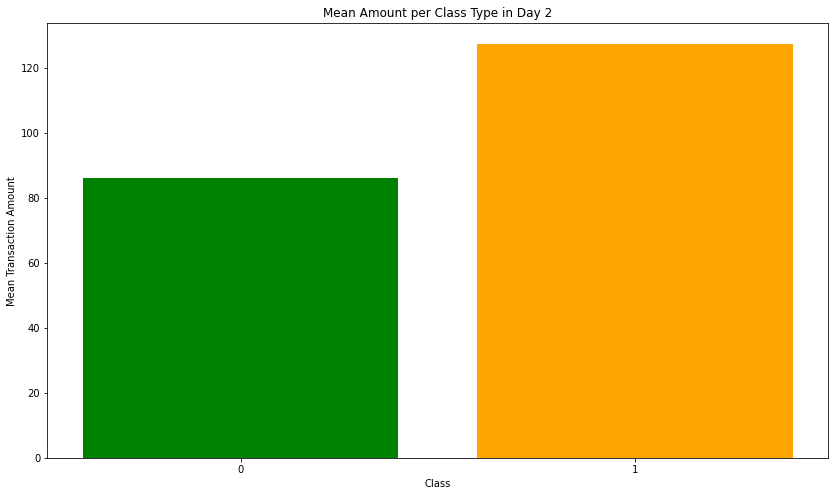

In [335]:
#Average amount per class type in Day 2
%matplotlib inline


av_amount_per_class = Day2.groupby('Class').Amount.mean()

#sort by amount
av_amount_per_class.sort_values(inplace=True)

x = av_amount_per_class.index.tolist()
y = av_amount_per_class.values.tolist()

#set figure size
plt.figure(figsize=(14,8))

#set title
plt.title('Mean Amount per Class Type in Day 2')

#set axis labels
plt.xlabel('Class')
plt.ylabel('Mean Transaction Amount')

plt.xticks(labels=x, ticks=np.arange(len(x)))

plt.bar(x,y, color =['green', 'orange']);

# **DATASET#3: Fraudulent transactions and Normal Transactions on Day 2**

In [13]:
FraudDay2 = Day2.loc[Day2.Class == 1]
NormalDay2 = Day2.loc[Day2.Class == 0]

# **Frequency of Fraudulent Transactions on Day 2**

(array([131.,  19.,  14.,   5.,   7.,   3.,   3.,   4.,   5.,   1.,   1.,
          1.,   0.,   2.,   3.,   1.,   1.,   3.,   0.,   1.,   0.,   1.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.    ,   42.5174,   85.0348,  127.5522,  170.0696,  212.587 ,
         255.1044,  297.6218,  340.1392,  382.6566,  425.174 ,  467.6914,
         510.2088,  552.7262,  595.2436,  637.761 ,  680.2784,  722.7958,
         765.3132,  807.8306,  850.348 ,  892.8654,  935.3828,  977.9002,
        1020.4176, 1062.935 , 1105.4524, 1147.9698, 1190.4872, 1233.0046,
        1275.522 , 1318.0394, 1360.5568, 1403.0742, 1445.5916, 1488.109 ,
        1530.6264, 1573.1438, 1615.6612, 1658.1786, 1700.696 , 1743.2134,
        1785.7308, 1828.2482, 1870.7656, 1913.283 , 1955.8004, 1998.3178,
        2040.8352, 2083.3526, 2125.87  ]),
 <a list of 50 Patch ob

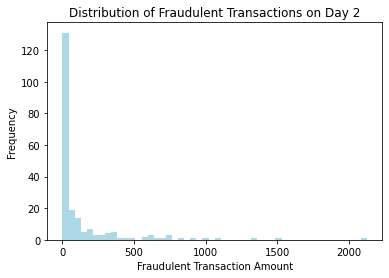

In [ ]:
#title
plt.title('Distribution of Fraudulent Transactions on Day 2')

#x and y labels
plt.xlabel('Fraudulent Transaction Amount')
plt.ylabel('Frequency')

#plot histogram
plt.hist(FraudDay2['Amount'], bins=50, color='lightblue')

# **Boxplot showing Outliers of Fraudulent Transactions on Day 2**

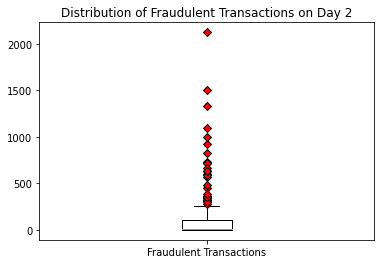

In [ ]:
data3 = FraudDay2['Amount']

#create outlier point shape
red_diamond = dict(markerfacecolor= 'r', marker='D')

#set title
plt.title('Distribution of Fraudulent Transactions on Day 2')

#plot boxplot
plt.boxplot(data3.values, labels=['Fraudulent Transactions'], flierprops = red_diamond);

# **Frequency of Normal Transactions on Day 2**

(array([1.37741e+05, 4.34600e+03, 1.26900e+03, 5.32000e+02, 2.50000e+02,
        1.07000e+02, 8.00000e+01, 5.00000e+01, 3.50000e+01, 3.00000e+01,
        2.60000e+01, 9.00000e+00, 3.00000e+00, 9.00000e+00, 3.00000e+00,
        4.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.    ,   393.1306,   786.2612,  1179.3918,  1572.5224,
         1965.653 ,  2358.7836,  2751.9142,  3145.0448,  3538.1754,
         3931.306 ,  4324.4366,  4717.5672,  5110.6978,  5503.8284,
         5896.959 ,  6290.0896,  6683.2202,  7076.3508,  7469.48

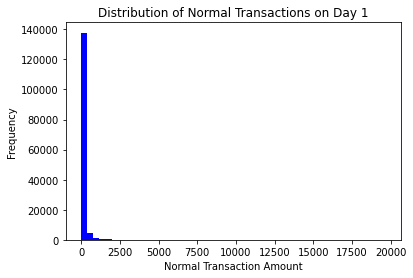

In [ ]:
#title
plt.title('Distribution of Normal Transactions on Day 1')

#x and y labels
plt.xlabel('Normal Transaction Amount')
plt.ylabel('Frequency')

#plot histogram
plt.hist(NormalDay1['Amount'], bins=50, color='blue')


# **Boxplot showing Outliers of Normal Transactions on Day 2**

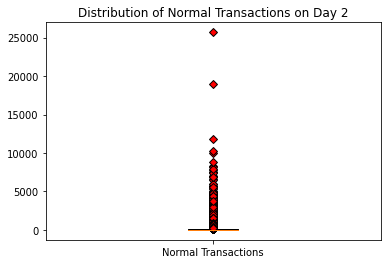

In [ ]:
data4 = NormalDay2['Amount']

#create outlier point shape
red_diamond = dict(markerfacecolor= 'r', marker='D')

#set title
plt.title('Distribution of Normal Transactions on Day 2')

#plot boxplot
plt.boxplot(data4.values, labels=['Normal Transactions'], flierprops = red_diamond);

#****PART 3: **Multivariate Analysis : Analyzing the relationship between the variables**

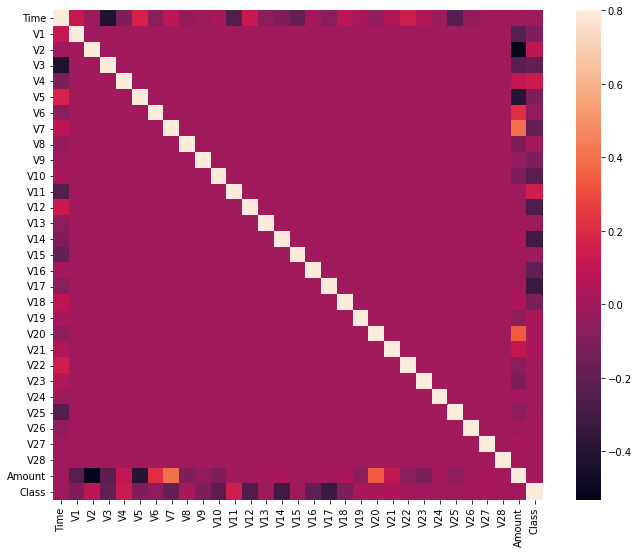

In [ ]:
#Correlation Matrix

correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

#Class has some correlations with V1,V3,V5,V7,V9,V10,V11,V12,V14,V16,V17,V18 features but not with time and amount

In [ ]:
correlation_matrix["Class"].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [14]:
data_edit = data.copy()

In [15]:
data_edit['Class'] = data_edit.Class.astype('category')

In [16]:
data_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 34 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Time      284807 non-null  float64       
 1   V1        284807 non-null  float64       
 2   V2        284807 non-null  float64       
 3   V3        284807 non-null  float64       
 4   V4        284807 non-null  float64       
 5   V5        284807 non-null  float64       
 6   V6        284807 non-null  float64       
 7   V7        284807 non-null  float64       
 8   V8        284807 non-null  float64       
 9   V9        284807 non-null  float64       
 10  V10       284807 non-null  float64       
 11  V11       284807 non-null  float64       
 12  V12       284807 non-null  float64       
 13  V13       284807 non-null  float64       
 14  V14       284807 non-null  float64       
 15  V15       284807 non-null  float64       
 16  V16       284807 non-null  float64    

In [ ]:

#sns.pairplot(data_edit, hue='Class', height=2.5);

# **Detecting Multicollinearity using VIF(Variable Inflation Factors).**

In [11]:
df2 = df.copy()
y = df2['Class'] 
X =df2[df2 != 'Class']

In [ ]:

# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


calc_vif(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,variables,VIF
0,Time,2.339858
1,V1,1.638237
2,V2,3.900804
3,V3,1.321018
4,V4,1.172479
5,V5,2.764441
6,V6,1.528629
7,V7,2.603517
8,V8,1.098591
9,V9,1.037715


As Amount is the only variable with high multicollinearity, we won't drop it. Amount is an important feature which we cannot drop. The other features can be kept as they have low multicollinearity (below 5)



0	Time	2.339858
1	V1	1.638237
2	V2	3.900804
3	V3	1.321018
4	V4	1.172479
5	V5	2.764441
6	V6	1.528629
7	V7	2.603517
8	V8	1.098591
9	V9	1.037715
10	V10	1.208870
11	V11	1.080378
12	V12	1.154440
13	V13	1.003473
14	V14	1.219562
15	V15	1.014148
16	V16	1.080994
17	V17	1.227258
18	V18	1.033900
19	V19	1.040800
20	V20	2.233935
21	V21	1.103107
22	V22	1.082408
23	V23	1.149293
24	V24	1.000773
25	V25	1.013526
26	V26	1.000539
27	V27	1.009509
28	V28	1.001595
29	Amount	11.507919
30	Class	2.093512




#**** PART 4:**Feature selection**

# **(A) FILTER METHOD - ANOVA**

Using Filter method,  ANOVA statistical test to determine relationship between categorical and numerical variables:

Assumption(H0): There is no relationship between the variables (i.e. The average(mean) values of the numeric Predictor variable is the same for all the groups in the categorical Target variable)

ANOVA Test result: Probability of H0 being true

In [71]:
import warnings
warnings.filterwarnings("ignore")

#load libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#load data
df3 = df.copy()

#create features and target
target = df3['Class'] 
features_df = df3.drop(['Class'], axis=1) 


#Select features with best ANOVA F values - create selectKbest object
selector = SelectKBest(f_classif, k=10)

#Apply the selectkbest object to features and target
selector.fit(features_df,target)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = features_df.iloc[:,cols]

#Show results
print("Original amount of features:", features_df.shape)
print("Reduced amount of features:", features_df_new .shape)


Original amount of features: (284807, 30)
Reduced amount of features: (284807, 10)


**Selected the 10 best features using ANOVA test:  V3, V4, V7, V10, V11, V12, V14, V16, V17, V18 **

We will also keep **Amount** as we are dealing with fraudulent transactions and it cannot be dropped.

In [72]:
features_df_new.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195


# **DATASET #4 - FEATURE SELECTION**

#**** Part 5  **DIVIDING THE DATASET - FEATURES SELECTED (X AND Y VARIABLES PER DAY 1 and DAY 2**

In [410]:
df1 = Day1.drop(['Time_new', 'Date', 'Day'], axis=1)
df2 = Day2.drop(['Time_new', 'Date', 'Day'], axis=1)

In [411]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140021 entries, 144786 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    140021 non-null  float64
 1   V1      140021 non-null  float64
 2   V2      140021 non-null  float64
 3   V3      140021 non-null  float64
 4   V4      140021 non-null  float64
 5   V5      140021 non-null  float64
 6   V6      140021 non-null  float64
 7   V7      140021 non-null  float64
 8   V8      140021 non-null  float64
 9   V9      140021 non-null  float64
 10  V10     140021 non-null  float64
 11  V11     140021 non-null  float64
 12  V12     140021 non-null  float64
 13  V13     140021 non-null  float64
 14  V14     140021 non-null  float64
 15  V15     140021 non-null  float64
 16  V16     140021 non-null  float64
 17  V17     140021 non-null  float64
 18  V18     140021 non-null  float64
 19  V19     140021 non-null  float64
 20  V20     140021 non-null  float64
 21  V21  

In [412]:
df_1 = df1.copy()
df_2 = df2.copy()

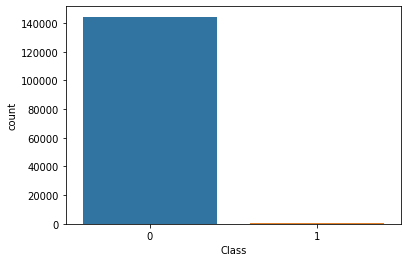

In [413]:
sns.countplot(df_1['Class'])

# **TRAIN TEST SPLIT - FEATURE SELECTION**

# **TRAIN SET - DAY 1 - FEATURE SELECTION**

In [414]:
y1 = df_1['Class']
x1 = df_1.drop(['Class','Time','V1', 'V2','V5', 'V6','V8','V9', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'], axis=1)

In [415]:
x1.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18,Amount
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,149.62
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,2.69
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,378.66
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,123.50
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,69.99


In [416]:
#Distribution in training set
y1.value_counts(normalize=True)


0    0.998059
1    0.001941
Name: Class, dtype: float64

In [417]:
#shape of training set
y1.shape, x1.shape

((144786,), (144786, 11))

# **TEST SET - DAY 2 **

In [418]:
y2 = df_2['Class']
x2 = df_2.drop(['Class','Time','V1', 'V2','V5', 'V6','V8','V9', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'], axis=1)

In [419]:
#Distribution in testing/validation set
y2.value_counts(normalize=True)

0    0.998493
1    0.001507
Name: Class, dtype: float64

In [420]:
#shape of testing set
x2.shape, y2.shape

((140021, 11), (140021,))

# Due to class imbalance, upsample the data to balance the dataset. Note: do not apply on testing set as there will be knowledge leak

# **option 1 - upsample**

In [421]:
from sklearn.utils import resample

In [422]:
df_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [423]:
#create two different dataframe of majority and minority class 
df_majority = df_1[(df_1['Class']==0)] 
df_minority = df_1[(df_1['Class']==1)] 

In [424]:
df_majority.shape


(144505, 31)

In [425]:
df_minority.shape

(281, 31)

In [426]:
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 144505, # to match majority class
                                 random_state=42)  # reproducible results


In [427]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [428]:
#display new class counts
df_upsampled['Class'].value_counts()

1    144505
0    144505
Name: Class, dtype: int64

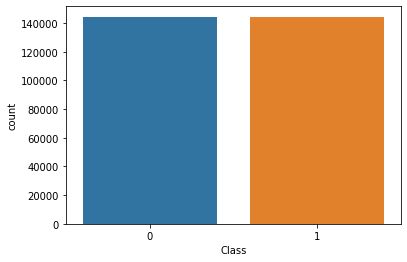

In [429]:
sns.countplot(df_upsampled['Class'])

# **New TRAIN SET (UPSAMPLED & FEATURE SELECTION - DAY 1)**

In [430]:
y1 = df_upsampled['Class']
x1 = df_upsampled.drop(['Class','Time','V1', 'V2','V5', 'V6','V8','V9', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'], axis=1)

# **SAME TEST SET (DAY 2), no upsampling done**

In [431]:
y2 = df_2['Class']
x2 = df_2.drop(['Class','Time','V1', 'V2','V5', 'V6','V8','V9', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'], axis=1)

# **** DATASET #5 BASELINE TRAIN SET - DAY 1****

**BASELINE Train set - upsampled**

In [432]:
bday1 = df_upsampled.copy()

In [433]:
b_y1 = bday1['Class']
b_x1 = bday1.drop(['Class'], axis=1)

In [434]:
#Distribution in training set
b_y1.value_counts(normalize=True)

1    0.5
0    0.5
Name: Class, dtype: float64

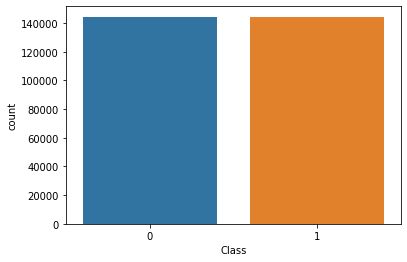

In [435]:
sns.countplot(bday1['Class'])

# **BASELINE TEST SET**

In [436]:
bday2 = df_2.copy()

In [437]:
b_y2 = bday2['Class']
b_x2 = bday2.drop(['Class'], axis=1)

# ** **PART 6: PREDICTIVE MODELING**

# *Predict Day 2 (test) from Day 1(train) Dataset*

# ** ****** (1) Decision Tree Classifier****** **

# **(A) FEATURE SELECTION - FILTER METHOD**

In [179]:
#import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier


In [180]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=45, max_depth=5)

In [181]:
%%time
#fitting the model
dt_model.fit(x1,y1)

CPU times: user 1.53 s, sys: 2.89 ms, total: 1.53 s
Wall time: 1.53 s


DecisionTreeClassifier(max_depth=5, random_state=45)

In [182]:
#checking the training score
dt_model.score(x1,y1)

0.9615272827929829

In [183]:
#predict on testing set
y_pred = dt_model.predict(x2)

# **Evaluation metrics - Filter**

In [174]:
from sklearn.metrics import accuracy_score

In [184]:
accuracy_score(y2, y_pred)

0.9825740424650589

In [185]:
y_pred.shape

(140021,)

In [186]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y2, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[137403   2407]
 [    33    178]]
TP:  178 , FP:  2407 , TN:  137403 , FN: 33


In [187]:
#print precision, recall, and accuracy from the perspective of each of the class 
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y2, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    139810
           1       0.07      0.84      0.13       211

    accuracy                           0.98    140021
   macro avg       0.53      0.91      0.56    140021
weighted avg       1.00      0.98      0.99    140021



In [188]:
dt_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 45,
 'splitter': 'best'}

# **(B) FEATURE SELECTION - WRAPPER METHOD**

In [125]:
!pip install mlxtend


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [126]:
import sys
#sys.modules['sklearn.externals.six'] = six

import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [209]:
%%time
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.tree import DecisionTreeClassifier


# Build DT classifier to use in feature selection
clf = DecisionTreeClassifier(random_state=45, max_depth=5)

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=5,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(x1, y1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   10.9s finished

[2022-07-25 06:00:58] Features: 1/5 -- score: 0.9422338327393515[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   13.3s finished

[2022-07-25 06:01:11] Features: 2/5 -- score: 0.9553648662676032[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   16.7s finished

[2022-07-25 06:01:28] Features: 3/5 -- score: 0.9559254005051729[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

CPU times: user 1min 21s, sys: 374 ms, total: 1min 22s
Wall time: 1min 22s


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   21.2s finished

[2022-07-25 06:02:10] Features: 5/5 -- score: 0.9588145738901769

In [210]:
# Which features?

sfs1.k_feature_names_
#('V4', 'V10', 'V12', 'V14', 'V17')
#we will still keep amount

('V4', 'V10', 'V12', 'V14', 'V17')

In [217]:
#new wrapper feature set

wx1 = x1[['V4', 'V10', 'V12', 'V14', 'V17', 'Amount']]
wx2 = x2[['V4', 'V10', 'V12', 'V14', 'V17', 'Amount']]

In [218]:
%%time
# Build full model with selected features
clf = DecisionTreeClassifier(random_state=45, max_depth=5)
clf.fit(wx1, y1)


CPU times: user 827 ms, sys: 969 µs, total: 828 ms
Wall time: 828 ms


In [219]:
#predict training set
y_train_pred = clf.predict(wx1)


In [220]:
#predict testing set
y_test_pred = clf.predict(wx2)

# **Evaluation metrics- Wrapper**

In [221]:
#print precision, recall, and accuracy from the perspective of each of the class 
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y2, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    139810
           1       0.06      0.85      0.11       211

    accuracy                           0.98    140021
   macro avg       0.53      0.91      0.55    140021
weighted avg       1.00      0.98      0.99    140021



# **(C) PARAMETER TUNING**

In [246]:
%%time
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
  
# Creating the hyperparameter grid 
param_dist = {"max_depth": range(2,8),
              "max_features": randint(2, 6),
              "min_samples_leaf": randint(1, 4),
              "random_state": randint(1,10),
              "criterion": ["gini", "entropy"]}
  
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
  
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
  
tree_cv.fit(wx1, y1)
  
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 2, 'random_state': 2}
Best score is 0.979101069167157
CPU times: user 25.5 s, sys: 98.3 ms, total: 25.6 s
Wall time: 25.5 s


In [ ]:
#best param
#Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 2, 'random_state': 2}
#Best score is 0.979101069167157
#CPU times: user 25.5 s, sys: 98.3 ms, total: 25.6 s
#Wall time: 25.5 s

In [247]:
tuned_tree = DecisionTreeClassifier(max_depth=7, max_features = 5, criterion ="entropy", min_samples_leaf= 2, random_state=2)

tuned_tree.fit(wx1, y1)
tuned_tree_predictions = tuned_tree.predict(wx2)
accuracy_score(y2, tuned_tree_predictions)

0.983716728205055

In [ ]:
#visualizing DT

feature_list = list(wx1.columns)

#importing libraries
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot

#pulling out one tree from the forest
tree = tuned_tree.estimators_[5]
export_graphviz(tree, out_file = 'dttree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('dttree.dot')

# export to a png file
display(Image(graph.create_png()))

# **Evaluation Metrics - Tuning**

In [248]:
#print precision, recall, and accuracy from the perspective of each of the class 
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y2, tuned_tree_predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    139810
           1       0.07      0.74      0.12       211

    accuracy                           0.98    140021
   macro avg       0.53      0.86      0.56    140021
weighted avg       1.00      0.98      0.99    140021



# **(D) BASELINE MODEL**

In [226]:
#creating the decision tree function
baseline_model = DecisionTreeClassifier(random_state=26, max_depth=5)

In [227]:
%%time
#fitting the model
baseline_model.fit(b_x1, b_y1)

CPU times: user 4.17 s, sys: 15.7 ms, total: 4.18 s
Wall time: 4.18 s


DecisionTreeClassifier(max_depth=5, random_state=26)

In [228]:

#predict on testing set
y_pred_b = baseline_model.predict(b_x2)

In [229]:
accuracy_score(b_y2, y_pred_b)

0.9752037194420837

# Evaluation Metrics - Baseline Model

In [230]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(b_y2, y_pred_b)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[136382   3428]
 [    44    167]]
TP:  167 , FP:  3428 , TN:  136382 , FN: 44


In [231]:
#print precision, recall, and accuracy from the perspective of each of the class 
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(b_y2, y_pred_b))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    139810
           1       0.05      0.79      0.09       211

    accuracy                           0.98    140021
   macro avg       0.52      0.88      0.54    140021
weighted avg       1.00      0.98      0.99    140021



# ** ****** (2) Random Forest Classifier****** **

# **(A) FEATURE SELECTION - FILTER**

In [249]:
#importing the Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

In [250]:
%%time
# fitting the random forest
rfc = RandomForestClassifier(random_state=45, max_depth=5)
rfc.fit(x1,y1)

CPU times: user 30.1 s, sys: 153 ms, total: 30.3 s
Wall time: 30.4 s


In [251]:
#checking the training score
rfc.score(x1,y1)

0.9566450987855092

In [252]:
y_pred = rfc.predict(x2)

# **Evaluation Metrics - Filter**

In [253]:
from sklearn.metrics import accuracy_score

In [254]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y2, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[139423    387]
 [    38    173]]
TP:  173 , FP:  387 , TN:  139423 , FN: 38


In [255]:
#print precision, recall, and accuracy from the perspective of each of the class 
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y2, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    139810
           1       0.31      0.82      0.45       211

    accuracy                           1.00    140021
   macro avg       0.65      0.91      0.72    140021
weighted avg       1.00      1.00      1.00    140021



# **(B) FEATURE SELECTION - WRAPPER**

In [259]:
%%time
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier

# Build RF classifier to use in feature selection
rf = RandomForestClassifier(random_state=45, max_depth=5)

# Build step forward feature selection
sfs1 = sfs(rf,
           k_features=5,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(x1, y1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed: 11.5min finished

[2022-07-25 06:38:32] Features: 1/5 -- score: 0.945562437285907[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   56.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 10.1min finished

[2022-07-25 06:48:38] Features: 2/5 -- score: 0.9570257084529947[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   55.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  8.3min finished

[2022-07-25 06:56:56] Features: 3/5 -- score: 0.9590740804816441[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

CPU times: user 51min 13s, sys: 28.5 s, total: 51min 42s
Wall time: 51min 48s


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 10.2min finished

[2022-07-25 07:18:50] Features: 5/5 -- score: 0.964402615826442

In [260]:
# Which features?

sfs1.k_feature_names_
#'V3', 'V4', 'V10', 'V14', 'V16'

('V3', 'V4', 'V10', 'V14', 'V16')

In [273]:
#new wrapper feature set

wx1 = x1[['V3', 'V4', 'V10', 'V14', 'V16', 'Amount']]
wx2 = x2[['V3', 'V4', 'V10', 'V14', 'V16', 'Amount']]

In [263]:
%%time
# Build full model with selected features
rf = RandomForestClassifier(random_state=45, max_depth=5)
rf.fit(wx1, y1)

CPU times: user 22.2 s, sys: 106 ms, total: 22.3 s
Wall time: 24.4 s


In [264]:
#predict training set
y_train_pred = rf.predict(wx1)


In [265]:
#predict testing set
y_test_pred = rf.predict(wx2)

# **Evaluation Metrics - Wrapper**

In [266]:
#print precision, recall, and accuracy from the perspective of each of the class 
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y2, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    139810
           1       0.18      0.84      0.30       211

    accuracy                           0.99    140021
   macro avg       0.59      0.92      0.65    140021
weighted avg       1.00      0.99      1.00    140021



# **(C) PARAMETER TUNING**

In [284]:
%%time

from sklearn.model_selection import RandomizedSearchCV
  
# Creating the hyperparameter grid 
param_grid = {
    'bootstrap': [True],
    'max_depth': [3, 5],
    'max_features': [2, 6],
    'min_samples_leaf': [1, 4, 5],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [50, 60, 70]
}
  
# Instantiating RF classifier
tree = RandomForestClassifier()
  
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_grid, cv = 5)
  
tree_cv.fit(wx1, y1)
  
# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'n_estimators': 70, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 6, 'max_depth': 5, 'bootstrap': True}
Best score is 0.9644718175841666
CPU times: user 14min 27s, sys: 2.41 s, total: 14min 30s
Wall time: 14min 27s


In [285]:
tuned_tree = RandomForestClassifier (n_estimators= 70, min_samples_split= 6, min_samples_leaf= 4, max_features= 6, max_depth= 5, bootstrap= True)

tuned_tree.fit(wx1, y1)
tuned_tree_predictions = tuned_tree.predict(wx2)
accuracy_score(y2, tuned_tree_predictions)

0.979853022046693

In [ ]:
#best parameters
#Tuned Random Forest Parameters: {'n_estimators': 70, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 6, 'max_depth': 5, 'bootstrap': True}
#Best score is 0.9644718175841666
#CPU times: user 14min 27s, sys: 2.41 s, total: 14min 30s
#Wall time: 14min 27s

# **Evaluation Metrics - Tuning**

In [286]:
#print precision, recall, and accuracy from the perspective of each of the class 
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y2, tuned_tree_predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    139810
           1       0.06      0.83      0.11       211

    accuracy                           0.98    140021
   macro avg       0.53      0.91      0.55    140021
weighted avg       1.00      0.98      0.99    140021



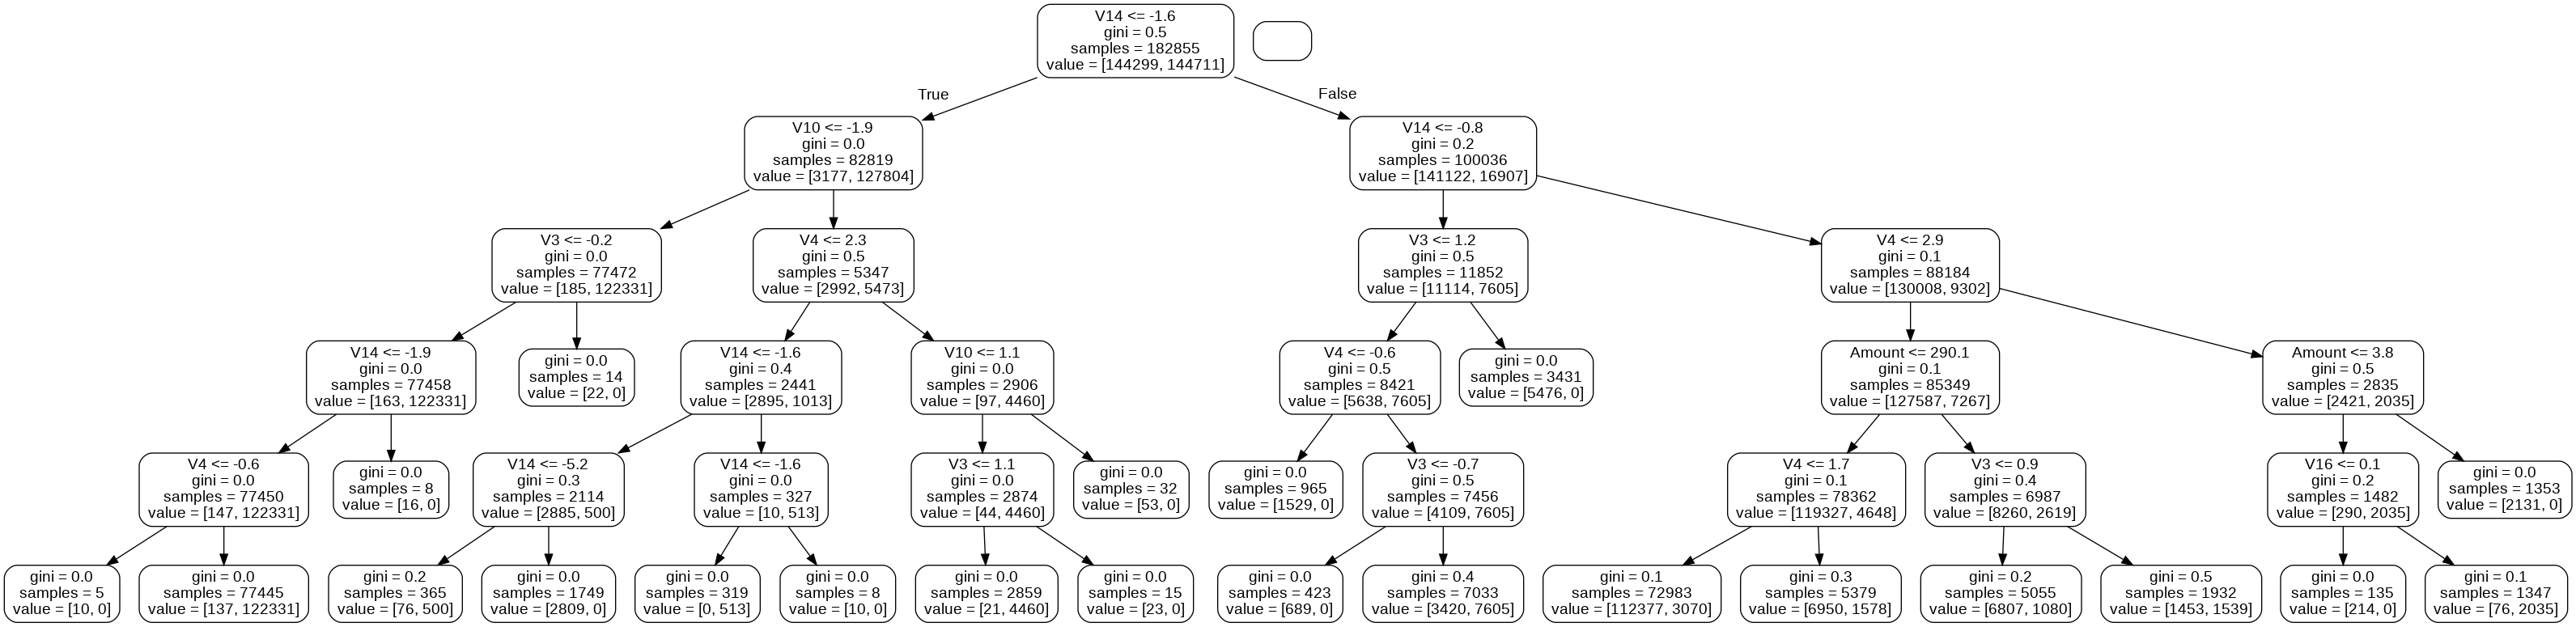

In [287]:
#visualizing RF

feature_list = list(wx1.columns)

#importing libraries
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot

#pulling out one tree from the forest
tree = tuned_tree.estimators_[5]
export_graphviz(tree, out_file = 'rftree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('rftree.dot')

# export to a png file
display(Image(graph.create_png()))

# **(D) BASELINE MODEL**

In [288]:
#importing the Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

In [289]:
%%time
# fitting the random forest
rfc = RandomForestClassifier(random_state=45, max_depth=5)
rfc.fit(b_x1,b_y1)

CPU times: user 52.1 s, sys: 136 ms, total: 52.2 s
Wall time: 55 s


In [290]:
#checking the training score
rfc.score(b_x1,b_y1)

0.9603439327358915

In [291]:
y_pred_b = rfc.predict(b_x2)

# **Evaluation Metrics - Baseline**

In [292]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(b_y2, y_pred_b)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[139541    269]
 [    40    171]]
TP:  171 , FP:  269 , TN:  139541 , FN: 40


In [293]:
#print precision, recall, and accuracy from the perspective of each of the class 
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(b_y2, y_pred_b))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    139810
           1       0.39      0.81      0.53       211

    accuracy                           1.00    140021
   macro avg       0.69      0.90      0.76    140021
weighted avg       1.00      1.00      1.00    140021



# ** ****** (3) Logistic Regression****** **

# **(A) FEATURE SELECTION - FILTER**

In [334]:
#importing logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=45, C = 0.01, penalty = "l2")

In [335]:
%%time
# fitting the logistic regression
lr.fit(x1, y1)

CPU times: user 5.08 s, sys: 2.69 s, total: 7.77 s
Wall time: 5.31 s


LogisticRegression(C=0.01, random_state=45)

In [336]:
#checking the training score
lr.score(x1,y1)

0.9408290370575413

In [337]:
#checking the testing score
lr.score(x2,y2)

0.9708400882724734

In [338]:
y_pred = lr.predict(x2)

# **Evaluation Metrics - Filter**

In [339]:
from sklearn.metrics import accuracy_score

In [340]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y2, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[135748   4062]
 [    21    190]]
TP:  190 , FP:  4062 , TN:  135748 , FN: 21


In [341]:
#print precision, recall, and accuracy from the perspective of each of the class 
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y2, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    139810
           1       0.04      0.90      0.09       211

    accuracy                           0.97    140021
   macro avg       0.52      0.94      0.54    140021
weighted avg       1.00      0.97      0.98    140021



# **(B) FEATURE SELECTION - WRAPPER**

In [345]:
%%time
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression


# Build DT classifier to use in feature selection
clf = LogisticRegression(random_state=45, C = 0.01, penalty = "l2")

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=6,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(x1, y1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   22.0s finished

[2022-07-25 09:46:00] Features: 1/6 -- score: 0.9261963253866649[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   20.1s finished

[2022-07-25 09:46:20] Features: 2/6 -- score: 0.9344693955226463[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   20.6s finished

[2022-07-25 09:46:40] Features: 3/6 -- score: 0.9400332168437078[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

CPU times: user 3min 5s, sys: 2min 15s, total: 5min 20s
Wall time: 2min 46s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.0min finished

[2022-07-25 09:48:24] Features: 6/6 -- score: 0.9414622331407217

In [346]:
# Which features?

sfs1.k_feature_names_
#('V4', 'V7','V10', 'V14', 'V16', 'Amount')

('V4', 'V7', 'V10', 'V14', 'V16', 'Amount')

In [347]:
#new wrapper feature set

wx1 = x1[['V4', 'V7', 'V10', 'V14', 'V16', 'Amount']]
wx2 = x2[['V4', 'V7', 'V10', 'V14', 'V16', 'Amount']]

In [349]:
%%time
# Build full model with selected features
clf = LogisticRegression()
clf.fit(wx1, y1)

CPU times: user 2.7 s, sys: 1.86 s, total: 4.57 s
Wall time: 2.35 s


In [351]:
#predict training set
y_train_pred = clf.predict(wx1)


In [352]:
#predict testing set
y_test_pred = clf.predict(wx2)

# **Evaluation Metrics - Wrapper**

In [353]:
#print precision, recall, and accuracy from the perspective of each of the class 
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y2, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    139810
           1       0.04      0.89      0.08       211

    accuracy                           0.97    140021
   macro avg       0.52      0.93      0.53    140021
weighted avg       1.00      0.97      0.98    140021



# **(C) PARAMETER TUNING**

In [364]:
%%time

from sklearn.model_selection import RandomizedSearchCV
  
# Creating the hyperparameter grid 
param_grid = {
    'C':[0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

  
# Instantiating LR
lr = LogisticRegression()
  
# Instantiating RandomizedSearchCV object
lr = RandomizedSearchCV(lr, param_grid, cv = 5)
  
lr.fit(wx1, y1)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(lr.best_params_))
print("Best score is {}".format(lr.best_score_))

Tuned Logistic Regression Parameters: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.05}
Best score is 0.9416905989412131
CPU times: user 2min 42s, sys: 31.7 s, total: 3min 13s
Wall time: 2min 36s


In [ ]:
#best param
#Tuned Logistic Regression Parameters: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.05}
#Best score is 0.9416905989412131
#CPU times: user 2min 42s, sys: 31.7 s, total: 3min 13s
#Wall time: 2min 36s

In [365]:
tuned_lr = LogisticRegression(C=1, solver= "newton-cg", penalty = "l2", random_state=45)

tuned_lr.fit(wx1, y1)
tuned_lr_predictions = tuned_lr.predict(wx2)
accuracy_score(y2, tuned_lr_predictions)

0.9707829539854737

In [367]:
#print precision, recall, and accuracy from the perspective of each of the class 
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y2, tuned_lr_predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    139810
           1       0.04      0.89      0.08       211

    accuracy                           0.97    140021
   macro avg       0.52      0.93      0.53    140021
weighted avg       1.00      0.97      0.98    140021



# **(D) BASELINE MODEL**

In [369]:
#importing logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=45, C = 0.01, penalty = "l2")

In [371]:
%%time
# fitting the logistic regression
lr.fit(b_x1, b_y1)

CPU times: user 7.19 s, sys: 3.24 s, total: 10.4 s
Wall time: 7.06 s


LogisticRegression(C=0.01, random_state=45)

In [372]:
y_pred_b = rfc.predict(b_x2)

# **Evaluation Metrics - Baseline Model**

In [373]:
from sklearn.metrics import accuracy_score

In [374]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(b_y2, y_pred_b)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[139541    269]
 [    40    171]]
TP:  171 , FP:  269 , TN:  139541 , FN: 40


In [375]:
#print precision, recall, and accuracy from the perspective of each of the class 
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(b_y2, y_pred_b))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    139810
           1       0.39      0.81      0.53       211

    accuracy                           1.00    140021
   macro avg       0.69      0.90      0.76    140021
weighted avg       1.00      1.00      1.00    140021



# ** ****** (4) Isolation Forest ****** ** 

# **(A) FEATURE SELECTION - FILTER**





In [376]:
#fraud and normal transactions dataset 
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

#proportion of fraud, which will be used as contamination level
outlier_proportion = len(fraud)/float(len(normal))
print(outlier_proportion)



0.0017304750013189597


In [438]:
#day 1 
y1 = df_1['Class']
x1 = df_1.drop(['Class','Time','V1', 'V2','V5', 'V6','V8','V9', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'], axis=1)

#day 2
y2 = df_2['Class']
x2 = df_2.drop(['Class','Time','V1', 'V2','V5', 'V6','V8','V9', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'], axis=1)

x_1 = x1.to_numpy() 
x_2 = x2.to_numpy() 

In [446]:
#convert to numpy
x_1 = x1.to_numpy() 

In [447]:
#convert to numpy
x_2 = x2.to_numpy() 

In [448]:
#importing isolation forest
from sklearn.ensemble import IsolationForest

In [449]:
#estimating anomaly population
contamination = outlier_proportion

In [451]:
%%time
model_if = IsolationForest(contamination=contamination, random_state=45)
model_if.fit(x_1)

CPU times: user 4.88 s, sys: 144 ms, total: 5.03 s
Wall time: 5.99 s


In [453]:
#predict train set 
y_pred_train = model_if.predict(x_1)

In [454]:
#predict test set 
y_pred_test = model_if.predict(x_2)

In [455]:
x1['scores'] = model_if.decision_function(x_1)



In [456]:
x1['anomaly_score'] = model_if.predict(x_1)



Fraudulent transactions on Day 1 - Train set

In [457]:
#fraudulent transactions in day 1 -  anomalies are assigned an anomaly score of -1.
x1[x1['anomaly_score']== -1]
#251 rows, 12 columns

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18,Amount,scores,anomaly_score
1632,-12.389545,6.013346,34.303177,-2.636622,3.702177,-1.843056,-1.652836,4.087802,-1.654892,-0.888406,7712.43,-0.045865,-1
2963,-2.742492,-0.940903,-9.198175,-5.453339,-1.582292,2.771415,3.189651,2.825793,2.126128,-1.303542,544.62,-0.010133,-1
6108,-2.592844,2.679787,-3.496197,-4.801637,4.895844,-10.912819,-6.771097,-7.358083,-12.598419,-5.131549,59.00,-0.047394,-1
6329,-4.304597,4.732795,1.713445,-2.447469,2.101344,-4.609628,-6.079337,2.581851,6.739384,3.042493,1.00,-0.016815,-1
6334,-6.560600,6.348557,-1.689102,-6.045468,6.754625,-8.948179,-10.733854,-1.638960,-1.746350,0.776744,1.00,-0.000105,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143336,-9.746678,5.148263,-5.937767,-8.537758,6.348979,-8.681609,-11.608002,-5.363566,-11.939092,-3.583603,252.92,-0.084090,-1
143728,-4.153388,3.924526,-4.313217,-6.213355,4.522992,-6.652844,-8.604486,-5.945481,-9.338938,-2.390193,1.00,-0.045094,-1
143731,-5.436365,3.684737,-3.696178,-6.353887,4.351481,-6.453247,-8.442873,-5.440795,-9.518038,-2.438069,240.77,-0.069425,-1
144104,-5.660999,3.891160,-5.558679,-5.995676,4.221304,-6.119667,-8.149322,-5.375283,-9.315001,-2.487563,1.00,-0.050610,-1


In [458]:
fraud = x1[x1['anomaly_score']== -1]

In [459]:
#top outliers
fraud.sort_values(by=['scores'], ascending=True)

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18,Amount,scores,anomaly_score
10690,-12.466766,9.648311,-21.922811,-11.201400,9.328799,-13.104933,-10.140200,-10.098671,-17.506612,-8.061208,1218.89,-0.120277,-1
10630,-13.510931,8.617895,-9.462533,-11.786812,9.369079,-15.094163,-11.852161,-10.688242,-18.388811,-6.898840,766.36,-0.111516,-1
42741,-12.423635,7.519929,-9.984287,-13.215172,6.895181,-13.279700,-13.417012,-10.922655,-21.906493,-8.829820,459.07,-0.108798,-1
42769,-13.271718,8.925115,-12.703253,-12.805683,6.786058,-13.064240,-13.694873,-10.954286,-20.583593,-7.517262,118.30,-0.108256,-1
12468,-12.675299,5.890274,-10.361344,-10.514504,8.822317,-13.711031,-11.637008,-9.151540,-15.567463,-5.003983,89.99,-0.107172,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23128,-20.195367,4.249104,36.677268,-7.761890,-0.051013,-0.023820,-0.504989,6.098529,-0.205514,-1.031321,7429.15,-0.000997,-1
37000,-7.631400,5.975826,21.246173,-6.284888,-1.359855,-1.447966,0.234851,1.236134,-0.883152,2.745105,6950.51,-0.000461,-1
125671,-7.615316,0.014220,-7.945156,-2.279181,-2.669025,2.789239,5.691138,2.064214,2.179319,1.100664,2.96,-0.000344,-1
6334,-6.560600,6.348557,-1.689102,-6.045468,6.754625,-8.948179,-10.733854,-1.638960,-1.746350,0.776744,1.00,-0.000105,-1


Fraudulent transactions on Day 2 - Test set

In [460]:
x2['scores'] = model_if.decision_function(x_2)

In [461]:
x2['anomaly_score'] = model_if.predict(x_2)

In [462]:
#fraudulent transactions in day 1 -  anomalies are assigned an anomaly score of -1.
x2[x2['anomaly_score']== -1]
#198 rows, 12 columns

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18,Amount,scores,anomaly_score
145090,-4.828868,8.461575,9.885845,8.077009,1.565153,-1.368406,-5.567237,2.238244,-2.198110,-0.568291,2018.09,-0.039351,-1
147548,-5.264265,3.446113,-3.291041,-3.936294,4.256564,-6.600654,-9.958531,-5.700141,-6.388093,-1.838159,1.18,-0.035172,-1
148908,-4.916562,4.809700,1.347216,-2.192541,1.621603,-4.280233,-6.440110,3.358763,6.029339,3.505916,0.77,-0.009698,-1
149522,-6.421490,2.434181,-3.227533,-4.723092,4.921657,-8.752770,-8.552023,-4.534030,-6.465409,-1.890310,52.69,-0.042604,-1
149587,-4.337200,2.378367,0.653745,-2.829098,3.504568,-3.918200,-4.704509,1.854772,6.024397,3.531250,1.00,-0.001306,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
282846,-11.440464,-1.095071,-7.109752,4.282442,-3.587139,3.270167,5.385183,1.609322,3.054471,0.517887,3.82,-0.016930,-1
282863,-11.907335,-1.110679,-7.479686,4.367054,-3.712310,3.440374,5.630943,1.709901,3.214280,0.539777,3.82,-0.022468,-1
282881,-12.374202,-1.126277,-7.849644,4.451663,-3.837486,3.610583,5.876709,1.810475,3.374091,0.561676,3.82,-0.026354,-1
282903,-12.841065,-1.141867,-8.219623,4.536268,-3.962664,3.780793,6.122479,1.911043,3.533903,0.583581,3.82,-0.026354,-1


In [463]:
fraud = x2[x2['anomaly_score']== -1]

In [464]:
fraud.sort_values(by=['scores'], ascending=True)

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18,Amount,scores,anomaly_score
150662,-12.816760,7.031115,-11.543207,-13.320789,8.460244,-17.003289,-14.094452,-12.661696,-18.912494,-6.626975,316.06,-0.108798,-1
150663,-12.816760,7.031115,-11.543207,-13.320789,8.460244,-17.003289,-14.094452,-12.661696,-18.912494,-6.626975,316.06,-0.108798,-1
150679,-20.491952,7.465780,-14.020564,-15.563791,7.610820,-15.592323,-13.247889,-10.342328,-16.044524,-5.882136,104.03,-0.107172,-1
150666,-16.760583,8.425832,-14.077086,-15.239962,8.030708,-16.060306,-14.952981,-11.866731,-15.486990,-5.748652,78.00,-0.107172,-1
150697,-16.962530,7.116091,-16.147363,-16.746044,7.425801,-15.564838,-14.029538,-11.133761,-15.833589,-5.748533,97.00,-0.107172,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171332,-8.676979,-1.852132,-5.357259,1.414401,-3.423222,1.956817,3.864248,3.237454,2.638578,1.238381,152.65,-0.001136,-1
219611,-4.752545,4.654684,1.302620,-1.647503,2.971171,-1.104164,-7.527288,3.342689,5.390562,3.470265,0.77,-0.000451,-1
217409,-12.672967,7.870263,8.976407,3.085563,2.707035,0.942581,-2.026269,3.826820,-1.385620,-2.906455,538.71,-0.000270,-1
282806,-10.507334,-1.063927,-6.374117,4.115278,-3.336057,2.930897,4.893776,1.408748,2.735121,0.472035,7.63,-0.000169,-1


# **Evaluation Metrics - Filter**

In [465]:
#Rename the prediction values to 0 for normal transactions , 1 for fraudulent transactions
y_pred_test[y_pred_test == 1] = 0
y_pred_test[y_pred_test == -1] = 1

In [466]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y2, y_pred_test))

#0.9987359039001292

0.9987716128295041


In [467]:
#print precision, recall, and accuracy from the perspective of each of the class 
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y2, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    139810
           1       0.60      0.54      0.57       211

    accuracy                           1.00    140021
   macro avg       0.80      0.77      0.78    140021
weighted avg       1.00      1.00      1.00    140021



# **(B) FEATURE SELECTION - WRAPPER**

In [494]:
#day 1 
y1 = df_1['Class']
x1 = df_1.drop(['Class','Time','V1', 'V2','V5', 'V6','V8','V9', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'], axis=1)

#day 2
y2 = df_2['Class']
x2 = df_2.drop(['Class','Time','V1', 'V2','V5', 'V6','V8','V9', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'], axis=1)

#convert to numpy
x_1 = x1.to_numpy() 
x_2 = x2.to_numpy() 

In [497]:
%%time
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import IsolationForest

# Build RF classifier to use in feature selection
isf = IsolationForest(random_state=45)

# Build step forward feature selection
sfs1 = sfs(isf,
           k_features=6,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(x1, y1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   59.9s finished

[2022-07-25 11:14:16] Features: 1/6 -- score: 0.001533287973527545[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   47.1s finished

[2022-07-25 11:15:03] Features: 2/6 -- score: 0.0005525362711389438[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   44.6s finished

[2022-07-25 11:15:48] Features: 3/6 -- score: 0.00046965714227694853[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

CPU times: user 4min 19s, sys: 4.96 s, total: 4min 24s
Wall time: 4min 26s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   34.6s finished

[2022-07-25 11:17:43] Features: 6/6 -- score: 0.0002900838678272639

In [498]:
# Which features?

sfs1.k_feature_names_
#'V3', 'V7', 'V12', 'V16', 'V18', 'Amount'

('V3', 'V7', 'V12', 'V16', 'V18', 'Amount')

In [500]:
#new wrapper feature set

wx1 = x1[['V3', 'V7', 'V12', 'V16', 'V18', 'Amount']]
wx2 = x2[['V3', 'V7', 'V12', 'V16', 'V18', 'Amount']]

In [501]:
%%time
# Build full model with selected features
isf = IsolationForest(random_state=45)
isf.fit(wx1, y1)

CPU times: user 485 ms, sys: 23.9 ms, total: 509 ms
Wall time: 509 ms


In [502]:
#predict training set
y_train_pred = rf.predict(wx1)

In [503]:
#predict testing set
y_test_pred = rf.predict(wx2)

# **Evaluation Metrics - Wrapper**

In [504]:
#print precision, recall, and accuracy from the perspective of each of the class 
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y2, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    139810
           1       0.01      0.03      0.01       211

    accuracy                           0.99    140021
   macro avg       0.50      0.51      0.51    140021
weighted avg       1.00      0.99      1.00    140021



# **(C) PARAMETER TUNING**

In [510]:
%%time

from sklearn.model_selection import RandomizedSearchCV
  
# Creating the hyperparameter grid 
param_grid = {
    'bootstrap': [True],
    'max_features': [2, 6],
    'n_estimators': [50, 60, 70],
    'contamination': ['auto', 0.0001, 0.0002]
}

  
# Instantiating LR
isf = IsolationForest()
  
# Instantiating RandomizedSearchCV object
isf = RandomizedSearchCV(isf, param_grid, cv = 5,  scoring="neg_mean_squared_error", refit=True, return_train_score=True)
  
isf.fit(wx1, y1)
  
# Print the tuned parameters and score
print("Tuned Isolation Forest Parameters: {}".format(isf.best_params_))


Tuned Isolation Forest Parameters: {'n_estimators': 50, 'max_features': 2, 'contamination': 0.0001, 'bootstrap': True}
CPU times: user 2min 19s, sys: 2.36 s, total: 2min 21s
Wall time: 2min 23s


In [ ]:
#Tuned Isolation Forest Parameters: {'n_estimators': 50, 'max_features': 2, 'contamination': 0.0001, 'bootstrap': True}
#CPU times: user 2min 19s, sys: 2.36 s, total: 2min 21s
#Wall time: 2min 23s

In [512]:
tuned_isf = IsolationForest(n_estimators= 50, max_features= 2, bootstrap= True, contamination= 0.0001)

tuned_isf.fit(wx1, y1)
tuned_isf_predictions = tuned_isf.predict(wx2)
accuracy_score(y2, tuned_isf_predictions)

0.0014854914619949866

# **Evaluation Metrics - Tuning**

In [513]:
#print precision, recall, and accuracy from the perspective of each of the class 
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y2, tuned_tree_predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    139810
           1       0.06      0.83      0.11       211

    accuracy                           0.98    140021
   macro avg       0.53      0.91      0.55    140021
weighted avg       1.00      0.98      0.99    140021



# **(D) BASELINE MODEL**

In [469]:
b_x1.shape

(289010, 30)

In [470]:
#baseline train set
bday1 = df_upsampled.copy()
b_y1 = bday1['Class']
b_x1 = bday1.drop(['Class'], axis=1)

In [471]:
#baseline test set
bday2 = df_2.copy()
b_y2 = bday2['Class']
b_x2 = bday2.drop(['Class'], axis=1)

In [472]:
#fraud and normal transactions dataset 
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

#proportion of fraud, which will be used as contamination level
outlier_proportion = len(fraud)/float(len(normal))
print(outlier_proportion)


0.0017304750013189597


In [473]:
#convert to numpy
x_1 = b_x1.to_numpy() 
x_2 = b_x2.to_numpy() 
 

In [474]:
#importing isolation forest
from sklearn.ensemble import IsolationForest

In [475]:
#estimating anomaly population
contamination = outlier_proportion

In [476]:
%%time
model_if = IsolationForest(random_state=45, contamination=contamination)
model_if.fit(x_1)

CPU times: user 11.1 s, sys: 224 ms, total: 11.3 s
Wall time: 12 s


In [477]:
#predict train set 
y_pred_train = model_if.predict(x_1)

In [478]:
#predict test set 
y_pred_test = model_if.predict(x_2)

In [479]:
b_x1['scores'] = model_if.decision_function(x_1)


In [480]:
b_x1['anomaly_score'] = model_if.predict(x_1)


In [481]:
#fraudulent transactions in day 1 -  anomalies are assigned an anomaly score of -1.
b_x1[b_x1['anomaly_score']== -1]
#31 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,scores,anomaly_score
1632,1264.0,-11.140706,-9.612726,-12.389545,6.013346,-32.092129,21.393069,34.303177,-7.520784,-1.925732,...,1.366110,-2.925888,0.843551,0.746267,0.801387,3.852046,4.157934,7712.43,-0.027895,-1
6812,8592.0,-23.066842,-25.640527,-3.080313,4.866932,6.901397,-4.074335,2.027345,-2.688652,3.402966,...,3.312971,13.876221,-0.572177,5.525093,0.906980,3.358822,3.553906,845.73,-0.019946,-1
7485,10201.0,-9.507807,-6.332182,-2.347929,5.909158,-1.946121,2.347826,-2.895307,-8.933411,0.512017,...,-0.071824,-10.477978,0.461380,-2.160800,0.327158,4.173387,-3.054085,1895.88,-0.007695,-1
8610,11621.0,-27.670569,-34.607649,2.243079,10.463020,34.099309,-23.496714,-26.548144,-0.779134,7.496577,...,-1.627883,-11.669994,2.192626,-2.483069,1.788189,8.254376,-3.509250,55.25,-0.025168,-1
19760,30537.0,-14.191832,-25.313252,-7.578781,7.730844,-8.285413,3.994474,9.656752,-1.502509,-0.231141,...,-4.067605,-6.869451,0.107527,-2.640366,-1.237598,-1.387145,1.389367,7879.42,-0.000959,-1
23128,32605.0,-23.383129,-18.098804,-20.195367,4.249104,-42.147898,22.529298,36.677268,-4.862800,1.645619,...,-0.139751,-6.086173,1.924973,0.669689,0.449781,11.135740,-9.617915,7429.15,-0.018293,-1
39769,39954.0,-56.407510,-72.715728,-6.605265,16.491217,34.801666,-26.160506,-19.399981,-1.501300,6.967698,...,-1.272167,7.893082,0.767805,5.376595,0.163672,-8.358317,33.847808,1201.83,-0.028165,-1
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,...,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,-0.033147,-1
50287,44423.0,-33.017174,-39.818310,-1.445971,10.739659,28.762671,-19.996349,-19.083907,-1.992887,5.000712,...,-1.701734,-12.529524,2.057019,-1.166944,0.156381,10.507884,-4.127442,2310.00,-0.020878,-1
52524,45502.0,-7.234663,4.013911,-3.883894,-2.686814,-11.940702,8.141055,3.631227,-19.013925,2.992497,...,-6.129680,-9.835095,1.413067,-1.920005,-0.252660,3.717436,-1.346962,3050.69,-0.004125,-1


In [482]:
#top outliers on day 1
fraud = b_x1[b_x1['anomaly_score']== -1]
fraud.sort_values(by=['scores'], ascending=True)

#31 rows × 32 columns

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,scores,anomaly_score
58465,48401.0,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,...,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,-0.068091,-1
108424,70891.0,-33.404082,-38.436817,-6.478019,12.699542,12.785108,-9.674221,-10.193438,-4.180491,5.882570,...,-3.635183,-22.575000,2.070945,-3.640055,-0.016901,9.200883,-5.944923,1235.79,-0.058893,-1
74699,55709.0,-16.950064,-16.417395,-12.523381,6.555638,-27.752964,18.072031,28.504065,-10.152220,2.124673,...,0.050097,-10.855949,1.550407,-0.502172,0.821714,12.152401,-4.009839,8790.26,-0.037451,-1
79267,57945.0,-30.821436,-35.616754,-4.460572,10.689621,18.611287,-13.360241,-7.260207,-1.293304,2.763696,...,1.929221,13.659458,0.554661,4.032572,1.642552,7.994762,-4.631633,0.76,-0.036287,-1
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,...,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,-0.033147,-1
65423,51575.0,-14.904340,12.793880,-7.888739,0.512373,-7.661829,16.614054,-31.764946,-73.216718,-6.290730,...,10.503090,4.245073,-1.412813,-0.730374,0.133557,-0.394370,0.942177,500.00,-0.033044,-1
39769,39954.0,-56.407510,-72.715728,-6.605265,16.491217,34.801666,-26.160506,-19.399981,-1.501300,6.967698,...,-1.272167,7.893082,0.767805,5.376595,0.163672,-8.358317,33.847808,1201.83,-0.028165,-1
54018,46253.0,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,...,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,11898.09,-0.027917,-1
1632,1264.0,-11.140706,-9.612726,-12.389545,6.013346,-32.092129,21.393069,34.303177,-7.520784,-1.925732,...,1.366110,-2.925888,0.843551,0.746267,0.801387,3.852046,4.157934,7712.43,-0.027895,-1
118764,75207.0,-3.432602,-3.110123,9.382558,-1.218808,7.515238,3.399540,15.661716,-18.958017,15.594995,...,2.766917,-2.971359,0.539097,-3.963454,-2.068561,-22.565679,-11.710896,243.26,-0.027357,-1


Fraudulent Transactions on Day 2 (Test set)

In [483]:
x2['scores'] = model_if.decision_function(x_2)

In [484]:
x2['anomaly_score'] = model_if.predict(x_2)

In [485]:
#fraudulent transactions in day 1 -  anomalies are assigned an anomaly score of -1.
x2[x2['anomaly_score']== -1]
#1

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18,Amount,scores,anomaly_score
145022,-5.377986,11.474590,0.068963,4.173965,1.530781,0.579988,-4.705675,4.202611,-2.863922,-0.132174,102.00,-0.032264,-1
145090,-4.828868,8.461575,9.885845,8.077009,1.565153,-1.368406,-5.567237,2.238244,-2.198110,-0.568291,2018.09,-0.030732,-1
151006,-30.177317,8.904157,-31.197329,-22.187089,4.419997,-10.592305,-3.926207,-6.809890,-12.462315,-5.501051,1.00,-0.007611,-1
151007,-30.177317,8.904157,-31.197329,-22.187089,4.419997,-10.592305,-3.926207,-6.809890,-12.462315,-5.501051,1.00,-0.007611,-1
151008,-30.177317,8.904157,-31.197329,-22.187089,4.419997,-10.592305,-3.926207,-6.809890,-12.462315,-5.501051,1.00,-0.007611,-1
151009,-30.177317,8.904157,-31.197329,-22.187089,4.419997,-10.592305,-3.926207,-6.809890,-12.462315,-5.501051,1.00,-0.007611,-1
151296,-21.340854,16.875344,24.422716,-8.908182,-0.083514,-2.281866,5.989210,3.032874,0.530779,4.712398,18910.00,-0.069980,-1
153851,-2.677573,4.577916,0.733276,3.191544,3.626705,-2.432376,-1.671117,4.549260,-1.518485,-1.082387,779.86,-0.027412,-1
154234,-22.209875,9.584969,-33.239328,-19.836149,3.223233,-10.895134,0.116303,-7.606425,-18.108261,-7.511866,1.00,-0.032339,-1
154316,-7.019710,3.713334,6.249410,-2.329979,1.870884,-1.993790,2.519971,1.162605,1.650030,-1.018793,5707.82,-0.007463,-1


In [486]:
fraud = x2[x2['anomaly_score']== -1]

In [487]:
#top outliers on day 2
fraud.sort_values(by=['scores'], ascending=True)

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18,Amount,scores,anomaly_score
274771,-48.325589,15.304184,120.589494,-12.005487,6.853897,-9.189418,-6.795942,17.315112,-7.173805,-1.968044,25691.16,-0.072535,-1
151296,-21.340854,16.875344,24.422716,-8.908182,-0.083514,-2.281866,5.989210,3.032874,0.530779,4.712398,18910.00,-0.069980,-1
199847,-6.203805,12.155016,7.551650,4.648793,1.777552,-1.226713,-3.217318,3.001233,-2.140843,0.756925,1860.00,-0.063139,-1
173353,-15.930586,6.945207,23.718783,2.362488,4.021344,-0.229003,-3.661824,5.196516,-2.571068,-3.977141,4861.64,-0.048490,-1
220090,-24.962322,8.413616,36.877368,0.909474,3.919686,-0.384260,-3.113694,8.289890,-2.490935,-3.570907,5964.95,-0.047282,-1
231454,-19.472908,9.216960,16.687265,-1.368484,2.545327,1.882563,0.418748,7.059132,-0.955952,-2.113101,3552.96,-0.046381,-1
219257,-16.227512,6.690679,17.256623,-2.431466,1.759989,1.861433,-1.409640,4.531275,0.220011,-1.604536,3502.11,-0.045057,-1
176335,-15.070015,9.211564,10.778805,4.524278,3.556634,1.445127,-2.463534,4.516603,-1.784110,-3.839299,1676.60,-0.044970,-1
224569,-22.588759,11.844703,14.203189,1.363213,4.018141,1.048973,-3.704008,6.442798,1.091949,-1.417654,200.00,-0.044954,-1
169457,-14.060281,10.473005,14.960521,-5.341249,0.713033,1.361297,2.969936,1.134212,0.297532,1.340820,11789.84,-0.043697,-1


# **Evaluation Metrics - Baseline**

In [488]:
#Rename the prediction values to 0 for normal transactions , 1 for fraudulent transactions
y_pred_test[y_pred_test == 1] = 0
y_pred_test[y_pred_test == -1] = 1

In [491]:
from sklearn.metrics import accuracy_score
print(accuracy_score(b_y2, y_pred_test))

#0.9981788446018811

0.9981788446018811


In [490]:
#print precision, recall, and accuracy from the perspective of each of the class 
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(b_y2, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    139810
           1       0.13      0.04      0.06       211

    accuracy                           1.00    140021
   macro avg       0.57      0.52      0.53    140021
weighted avg       1.00      1.00      1.00    140021



End of project

Shaleena Ramanah
Student ID: 501043123
CIND 820 